<a href="https://colab.research.google.com/github/mayankpurohit/exploratory-data-analysis/blob/main/Unicorn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [116]:
unicorn_df = pd.read_csv('/content/Unicorn_Companies.csv')
unicorn_df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,04-07-2017,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12-01-2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12-12-2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


In [117]:
unicorn_df.shape

(1037, 13)

In [118]:
unicorn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


In [119]:
unicorn_df.isna().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                 0
Industry             0
Select Inverstors    0
Founded Year         0
Total Raised         0
Financial Stage      0
Investors Count      0
Deal Terms           0
Portfolio Exits      0
dtype: int64

In [120]:
unicorn_df.dtypes

Company              object
Valuation ($B)       object
Date Joined          object
Country              object
City                 object
Industry             object
Select Inverstors    object
Founded Year         object
Total Raised         object
Financial Stage      object
Investors Count      object
Deal Terms           object
Portfolio Exits      object
dtype: object

In [121]:
unicorn_df.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
count,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037
unique,1035,200,623,46,254,18,1009,37,914,10,54,16,5
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,None,2015,None,None,10,1,None
freq,2,244,9,536,145,210,4,144,24,988,69,280,988


In [122]:
unicorn_df['Date Joined'] = pd.to_datetime(unicorn_df['Date Joined'])

In [123]:
unicorn_df['Select Inverstors'].value_counts()

None                                                              4
Sequoia Capital                                                   3
Tiger Global Management, Sequoia Capital India, Ribbit Capital    2
Hopu Investment Management, Boyu Capital, DC Thomson Ventures     2
Undisclosed                                                       2
                                                                 ..
Google Ventures, Index Ventures, Scale Venture Partners           1
RedBird Capital Partners, CJ ENM, Tencent Holdings                1
Relay Ventures, TTV Capital, Canapi Ventures                      1
Temasek, Google Ventures, General Catalyst                        1
Zeev Ventures, Bond, Fifth Wall Ventures                          1
Name: Select Inverstors, Length: 1009, dtype: int64

In [136]:
unicorn_df['Industry'].value_counts()

Fintech                                213
Internet software & services           194
E-commerce & direct-to-consumer        110
Artificial Intelligence                 80
Health                                  69
Supply chain, logistics, & delivery     58
Other                                   56
Cybersecurity                           49
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                33
Auto & transportation                   29
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Name: Industry, dtype: int64

In [133]:
unicorn_df[unicorn_df['Industry'] == 'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund']

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
814,WeLab,$1,2017-11-08,Hong Kong,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene...",None,2013,$896M,None,13,3,None


In [134]:
unicorn_df.iloc[814]

Company                                                          WeLab
Valuation ($B)                                                      $1
Date Joined                                        2017-11-08 00:00:00
Country                                                      Hong Kong
City                                                           Fintech
Industry             Sequoia Capital China, ING, Alibaba Entreprene...
Select Inverstors                                                 None
Founded Year                                                      2013
Total Raised                                                     $896M
Financial Stage                                                   None
Investors Count                                                     13
Deal Terms                                                           3
Portfolio Exits                                                   None
Name: 814, dtype: object

In [135]:
unicorn_df.loc[814,['City','Industry','Select Inverstors']] = ['Hong Kong','Fintech', 'Andreessen Horowitz, DST Global, IDG Capital']

In [128]:
unicorn_df[unicorn_df['Industry'] == 'Tiger Global Management, Tiger Brokers, DCM Ventures']

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
292,Amber Group,$3,2021-06-21,Hong Kong,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve...",None,2015,$328M,None,18,3,None


In [130]:
unicorn_df.iloc[292]

Company                                                    Amber Group
Valuation ($B)                                                      $3
Date Joined                                        2021-06-21 00:00:00
Country                                                      Hong Kong
City                                                           Fintech
Industry             Tiger Global Management, Tiger Brokers, DCM Ve...
Select Inverstors                                                 None
Founded Year                                                      2015
Total Raised                                                     $328M
Financial Stage                                                   None
Investors Count                                                     18
Deal Terms                                                           3
Portfolio Exits                                                   None
Name: 292, dtype: object

In [131]:
unicorn_df.loc[292,['City','Industry','Select Inverstors']] = ['Hong Kong','Fintech', 'Andreessen Horowitz, DST Global, IDG Capital']

In [125]:
unicorn_df[unicorn_df['Industry'] == 'Andreessen Horowitz, DST Global, IDG Capital']

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
951,Cider,$1,2021-09-02,Hong Kong,E-commerce & direct-to-consumer,"Andreessen Horowitz, DST Global, IDG Capital",None,2020,$131.46M,None,8,2,None


In [126]:
unicorn_df.iloc[951]

Company                                                     Cider
Valuation ($B)                                                 $1
Date Joined                                   2021-09-02 00:00:00
Country                                                 Hong Kong
City                              E-commerce & direct-to-consumer
Industry             Andreessen Horowitz, DST Global, IDG Capital
Select Inverstors                                            None
Founded Year                                                 2020
Total Raised                                             $131.46M
Financial Stage                                              None
Investors Count                                                 8
Deal Terms                                                      2
Portfolio Exits                                              None
Name: 951, dtype: object

In [127]:
unicorn_df.loc[951,['City','Industry','Select Inverstors']] = ['Hong Kong','Fintech', 'Andreessen Horowitz, DST Global, IDG Capital']

In [137]:
unicorn_df.head(10)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2
5,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2012,$571.26M,None,26,8,None
6,Checkout.com,$40,2019-05-02,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",2012,$1.83B,None,15,4,None
7,Instacart,$39,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",2012,$2.686B,None,29,12,None
8,Databricks,$38,2019-02-05,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2013,$3.497B,None,29,8,None
9,Revolut,$33,2018-04-26,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",2015,$1.716B,None,31,6,None


In [138]:
unicorn_df['Valuation ($B)'] = unicorn_df['Valuation ($B)'].replace({'\$':""}, regex=True)
unicorn_df['Valuation ($B)'] = unicorn_df['Valuation ($B)'].astype(float)
unicorn_df['Valuation ($B)']


0       140.0
1       100.3
2        95.0
3        45.6
4        42.0
        ...  
1032      1.0
1033      1.0
1034      1.0
1035      1.0
1036      1.0
Name: Valuation ($B), Length: 1037, dtype: float64

In [139]:
unicorn_df = unicorn_df[['Company','Valuation ($B)', 'Date Joined', 
                         'Country', 'City', 'Industry','Select Inverstors',
                         'Founded Year', 'Total Raised', 'Investors Count',
                         'Deal Terms'
                         ]]
unicorn_df.head()                         

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Investors Count,Deal Terms
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,28,8
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,29,12
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,39,12
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,56,13
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,25,5


In [140]:
unicorn_df.dtypes

Company                      object
Valuation ($B)              float64
Date Joined          datetime64[ns]
Country                      object
City                         object
Industry                     object
Select Inverstors            object
Founded Year                 object
Total Raised                 object
Investors Count              object
Deal Terms                   object
dtype: object

In [141]:
unicorn_df['Investors Count'].unique()

array(['28', '29', '39', '56', '25', '26', '15', '31', '40', '21', '24',
       '45', '9', '18', '7', '8', '16', '13', '34', '14', '10', '41',
       '19', '6', '37', '27', '36', '20', '70', '33', '17', '22', '54',
       '35', '11', '85', '32', '1', '2', '30', '12', '23', '4', '5', '38',
       '3', '53', '44', '43', '46', '42', 'None', '91', '55'],
      dtype=object)

In [142]:
unicorn_df['Investors Count'] = unicorn_df['Investors Count'].replace({'None':np.nan}, regex=True)
unicorn_df['Investors Count'].unique()

array(['28', '29', '39', '56', '25', '26', '15', '31', '40', '21', '24',
       '45', '9', '18', '7', '8', '16', '13', '34', '14', '10', '41',
       '19', '6', '37', '27', '36', '20', '70', '33', '17', '22', '54',
       '35', '11', '85', '32', '1', '2', '30', '12', '23', '4', '5', '38',
       '3', '53', '44', '43', '46', '42', nan, '91', '55'], dtype=object)

In [143]:
unicorn_df['Investors Count'] = unicorn_df['Investors Count'].astype(float)

In [144]:
unicorn_df['Deal Terms'] = unicorn_df['Deal Terms'].replace({'None': np.nan}, regex=True)
unicorn_df['Deal Terms']

0        8
1       12
2       12
3       13
4        5
        ..
1032     2
1033     2
1034     6
1035     2
1036     1
Name: Deal Terms, Length: 1037, dtype: object

In [145]:
unicorn_df['Total Raised'] = unicorn_df['Total Raised'].replace({"\$": ""}, regex=True)
unicorn_df['Total Raised']

0         7.44B
1        6.874B
2        2.901B
3        3.472B
4        4.377B
         ...   
1032    181.06M
1033       700M
1034    449.72M
1035     525.5M
1036     604.5M
Name: Total Raised, Length: 1037, dtype: object

In [146]:
unicorn_df['Total Raised Unity'] = unicorn_df['Total Raised'].str[-1]

In [147]:
unicorn_df['Total Raised'] = unicorn_df['Total Raised'].replace({
    "B$": "", "M$": "", "None": np.nan, "K$": ""}, regex=True)
unicorn_df['Total Raised'] = unicorn_df['Total Raised'].astype(float)

In [148]:
for i, row in unicorn_df.iterrows():
    if row["Total Raised Unity"] == "B":
        unicorn_df.loc[i, "Total Raised"] = row["Total Raised"] * 1000000000
    elif row["Total Raised Unity"] == "M":
        unicorn_df.loc[i, "Total Raised"] = row["Total Raised"] * 1000000
    elif row["Total Raised Unity"] == "K":
        unicorn_df.loc[i, "Total Raised"] = row["Total Raised"] * 1000


unicorn_df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Investors Count,Deal Terms,Total Raised Unity
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440000e+09,28.0,8,B
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874000e+09,29.0,12,B
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2.901000e+09,39.0,12,B
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3.472000e+09,56.0,13,B
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4.377000e+09,25.0,5,B


In [149]:
unicorn_df.drop('Total Raised Unity', axis=1, inplace=True)

In [150]:
unicorn_df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Investors Count,Deal Terms
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440000e+09,28.0,8
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874000e+09,29.0,12
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2.901000e+09,39.0,12
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3.472000e+09,56.0,13
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4.377000e+09,25.0,5


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

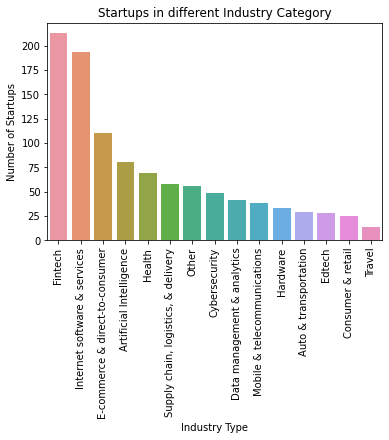

In [165]:
sns.barplot(x=unicorn_df['Industry'].value_counts().index,y=unicorn_df['Industry'].value_counts().values)
plt.title("Startups in different Industry Category")
plt.xlabel('Industry Type')
plt.ylabel('Number of Startups')
plt.xticks(rotation=90)

In [152]:
valuation_per_country = unicorn_df.groupby('Country')['Valuation ($B)'].sum()
valuation_per_country = valuation_per_country.sort_values(ascending=False)
valuation_per_country

Country
United States           1829.74
China                    572.69
India                    187.05
United Kingdom           177.68
Germany                   66.70
Sweden                    60.52
Australia                 50.60
France                    49.87
Canada                    49.03
Israel                    38.42
Brazil                    36.98
Bahamas                   32.00
Indonesia                 30.90
South Korea               27.12
Netherlands               19.80
Hong Kong                 18.35
Singapore                 17.55
Mexico                    16.40
Turkey                    11.47
Estonia                    9.90
Ireland                    9.05
Belgium                    8.95
Japan                      8.82
Finland                    8.70
Austria                    7.61
Switzerland                6.60
Colombia                   6.40
Denmark                    5.70
Vietnam                    5.27
Spain                      5.05
Norway                     4.70


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

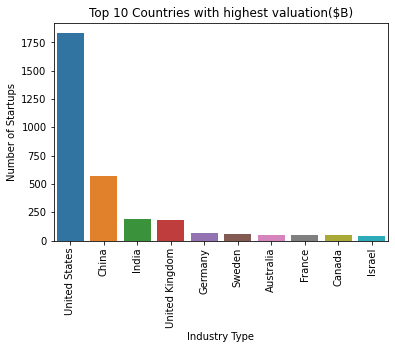

In [166]:
sns.barplot(x=valuation_per_country.index[:10], 
            y=valuation_per_country.values[:10])
plt.title('Top 10 Countries with highest valuation($B)')
plt.xlabel('Industry Type')
plt.ylabel('Number of Startups')
plt.xticks(rotation=90)

In [154]:
founded_at_count = unicorn_df.groupby('Founded Year').Company.count()
founded_at_count = founded_at_count.sort_index(ascending=True)
founded_at_count

Founded Year
1919      1
1973      1
1979      1
1984      1
1990      1
1991      1
1992      2
1993      1
1994      2
1995      2
1996      1
1997      1
1998      4
1999      8
2000     12
2001      8
2002      3
2003      7
2004      8
2005     15
2006     13
2007     23
2008     23
2009     33
2010     37
2011     76
2012     87
2013     85
2014    105
2015    144
2016    101
2017     67
2018     55
2019     34
2020     23
2021      8
None     43
Name: Company, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 <a list of 37 Text major ticklabel objects>)

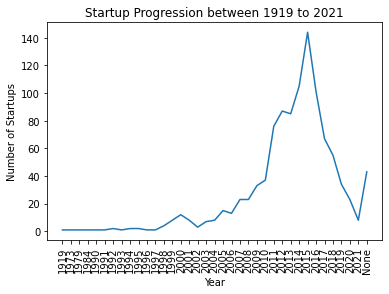

In [167]:
sns.lineplot(x=founded_at_count.index, y=founded_at_count.values)
plt.title('Startup Progression between 1919 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.xticks(rotation=90)

In [168]:
industry_raised = unicorn_df.groupby('Industry')['Total Raised'].sum()
industry_raised

Industry
Artificial Intelligence                4.454375e+10
Auto & transportation                  3.438302e+10
Consumer & retail                      1.318730e+10
Cybersecurity                          2.235340e+10
Data management & analytics            1.900160e+10
E-commerce & direct-to-consumer        7.514894e+10
Edtech                                 2.202012e+10
Fintech                                1.045018e+11
Hardware                               2.539535e+10
Health                                 3.360411e+10
Internet software & services           7.389173e+10
Mobile & telecommunications            1.534536e+10
Other                                  4.366574e+10
Supply chain, logistics, & delivery    4.288822e+10
Travel                                 1.332174e+10
Name: Total Raised, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

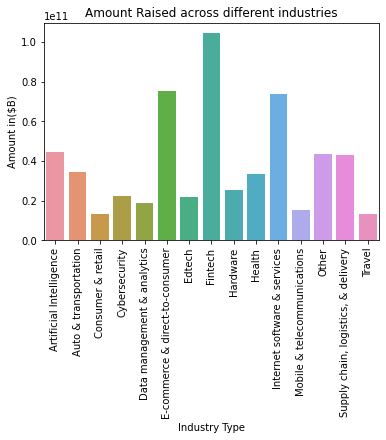

In [169]:
sns.barplot(x=industry_raised.index, y=industry_raised.values)
plt.title('Amount Raised across different Industries')
plt.xlabel('Industry Type')
plt.ylabel('Amount in($B)')
plt.xticks(rotation=90)

In [162]:
industry_investor_count = unicorn_df.groupby('Industry')['Investors Count'].sum()
industry_investor_count = industry_investor_count.sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

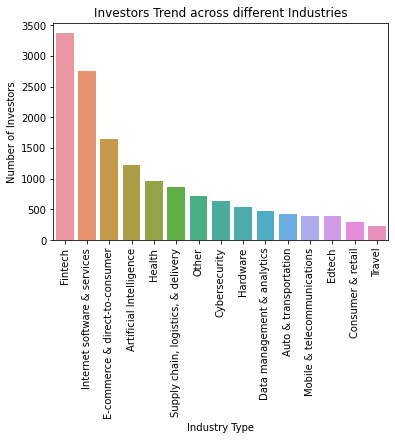

In [170]:
sns.barplot(x=industry_investor_count.index, y=industry_investor_count.values)
plt.title('Investors Trend across different Industries')
plt.xlabel('Industry Type')
plt.ylabel('Number of Investors')
plt.xticks(rotation=90)